In [1]:
import sys
sys.path.append('../implementation')
import numpy as np
import pandas as pd
import ast
from tqdm import tqdm
from util import lognormpdf
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from wall_bias import Wall
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
underlying_data = pd.read_csv('../data/wall/movies/movies-w-year.csv')
clean_id = [s.replace("p", "") for s in underlying_data['id']]
clean_id = [int(s.lstrip('0')) - 1 for s in clean_id]
underlying_data['id'] = clean_id
underlying_data = underlying_data.set_index('id')
underlying_data = underlying_data.sort_index()

output_file_path = '../output/movies/movies_wall.pkl'

interaction_data = pd.read_csv('../data/wall/movies/wall_movies_interactions.csv')
interaction_data['interaction_session'] = interaction_data.apply(lambda row: ast.literal_eval(row.interaction_session), axis=1)
interaction_data['interaction_type'] = interaction_data.apply(lambda row: ast.literal_eval(row.interaction_type), axis=1)
c_attrs = ['Worldwide Gross', 'Production Budget', 'Running Time', 'Rotten Tomatoes Rating', 'IMDB Rating']
d_attrs = ['Release Year', 'Content Rating', 'Genre', 'Creative Type']

In [3]:
# Not necessary to run if we already have results file for Wall
# Running Wall through all user interaction sessions and saving results in file
wall_results = pd.DataFrame()

for participant_index, row in interaction_data.iterrows():
    print(f'Processing user {row.user}')
    results = {'participant_id': row.user}
    wall = Wall(underlying_data, c_attrs, d_attrs)
    for i in tqdm(range(len(interaction_data.iloc[participant_index].interaction_session))):
        interaction = interaction_data.iloc[participant_index].interaction_session[i]
        interaction_d = pd.DataFrame(data=underlying_data.loc[int(interaction)].to_dict(), index=[i])
        wall.update(interaction_d)

    bias = wall.get_attribute_bias()
    for col in bias.columns:
        results[f'bias-{col}'] = bias[col].to_numpy()
    
    wall_results = wall_results.append(results, ignore_index=True)
    
wall_results.to_pickle(output_file_path)

  0%|          | 0/29 [00:00<?, ?it/s]

Processing user DBfcSjWTP9nt


  7%|▋         | 3/45 [00:00<00:01, 21.98it/s]

Processing user 2Jtw8zBTK7I6


  7%|▋         | 2/29 [00:00<00:01, 16.15it/s]

Processing user Q1dfVM1yXmgH


  4%|▎         | 3/82 [00:00<00:03, 25.59it/s]

Processing user nX7mgugNnmfP


 11%|█         | 3/27 [00:00<00:01, 23.87it/s]

Processing user SbiDJmMwv1WG


  4%|▍         | 2/48 [00:00<00:02, 19.37it/s]

Processing user N5i9m7xbOByc


 13%|█▎        | 3/23 [00:00<00:00, 21.87it/s]

Processing user YIRep3En6ujn


  6%|▌         | 3/50 [00:00<00:01, 28.21it/s]

Processing user kGaeO6nWXfnB


  5%|▍         | 3/63 [00:00<00:02, 28.79it/s]

Processing user 8wxcnYULqQeZ


  3%|▎         | 2/73 [00:00<00:03, 17.77it/s]

Processing user pvZDNlMQduIg


  3%|▎         | 2/63 [00:00<00:03, 17.45it/s]

Processing user IlFKbaBGWQDb


  3%|▎         | 2/75 [00:00<00:03, 18.56it/s]

Processing user EMAawqb59TK8


100%|██████████| 75/75 [00:03<00:00, 21.71it/s]


In [4]:
wall_results

,participant_id,bias-Release Year,bias-Content Rating,bias-Genre,bias-Creative Type,bias-Worldwide Gross,bias-Production Budget,bias-Running Time,bias-Rotten Tomatoes Rating,bias-IMDB Rating
0,DBfcSjWTP9nt,"[0.474470870237091, 0.3977020607771963, 0.4744...","[0.44217459962892525, 0.593994150290162, 0.657...","[0.4710813134741374, 0.38403934516693705, 0.47...","[0.463367332099215, 0.40859235606667754, 0.516...","[0.8366197183098592, 0.9864424238822528, 0.998...","[0.6084507042253521, 0.9229016857827698, 0.984...","[0.8253521126760563, 0.9845248707434481, 0.998...","[0.7887323943661971, 0.9138051940333988, 0.981...","[0.6338028169014085, 0.9054297656544047, 0.979..."
1,2Jtw8zBTK7I6,"[0.474470870237091, 0.5485827887742745, 0.7373...","[0.44217459962892525, 0.593994150290162, 0.657...","[0.4710813134741374, 0.38403934516693705, 0.47...","[0.463367332099215, 0.40859235606667754, 0.352...","[0.5352112676056338, 0.08215368158316994, 0.49...","[0.6084507042253521, 0.9229016857827698, 0.984...","[0.0, 0.4825617559081634, 0.655803173471207, 0...","[0.5492957746478874, 0.06190447891285833, 0.51...","[0.895774647887324, 0.7186188863136626, 0.8876..."
2,Q1dfVM1yXmgH,"[0.474470870237091, 0.5485827887742745, 0.4744...","[0.44217459962892525, 0.593994150290162, 0.355...","[0.4710813134741374, 0.5543203586353891, 0.758...","[0.463367332099215, 0.40859235606667754, 0.296...","[0.24788732394366197, 0.48810839721875565, 0.6...","[0.14647887323943665, 0.5646203522117232, 0.73...","[0.8732394366197183, 0.5776549592916146, 0.177...","[0.23098591549295777, 0.7036429547750639, 0.87...","[0.3577464788732394, 0.524327964976922, 0.6946..."
3,nX7mgugNnmfP,"[0.474470870237091, 0.3977020607771963, 0.3209...","[0.44217459962892525, 0.593994150290162, 0.657...","[0.4710813134741374, 0.38403934516693705, 0.29...","[0.463367332099215, 0.40859235606667754, 0.296...","[0.18028169014084505, 0.4472811552861472, 0.91...","[0.17183098591549295, 0.6563855708088191, 0.91...","[0.9633802816901409, 0.9736851488678908, 0.996...","[0.3098591549295775, 0.6278124442859689, 0.806...","[0.11267605633802813, 0.524327964976922, 0.412..."
4,SbiDJmMwv1WG,"[0.474470870237091, 0.3977020607771963, 0.3209...","[0.44217459962892525, 0.26424111765711533, 0.3...","[0.4710813134741374, 0.38403934516693705, 0.29...","[0.463367332099215, 0.40859235606667754, 0.296...","[0.3887323943661971, 0.8125789901150928, 0.942...","[0.5211267605633803, 0.08678116519086387, 0.48...","[0.24507042253521127, 0.71437966759771, 0.2138...","[0.2676056338028169, 0.5433529446722529, 0.280...","[0.6281690140845071, 0.7913274301222242, 0.251..."
5,N5i9m7xbOByc,"[0.474470870237091, 0.3977020607771963, 0.3209...","[0.44217459962892525, 0.593994150290162, 0.657...","[0.4710813134741374, 0.5543203586353891, 0.471...","[0.463367332099215, 0.657704044165409, 0.56652...","[0.9859154929577465, 0.9998811434004873, 0.999...","[0.9943661971830986, 0.9998336007606823, 0.999...","[0.9577464788732394, 0.9931776311879716, 0.999...","[0.24788732394366197, 0.516055545650839, 0.307...","[0.3154929577464789, 0.7650918167231235, 0.918..."
6,YIRep3En6ujn,"[0.474470870237091, 0.3977020607771963, 0.3209...","[0.44217459962892525, 0.26424111765711533, 0.3...","[0.4710813134741374, 0.38403934516693705, 0.47...","[0.463367332099215, 0.40859235606667754, 0.296...","[0.8816901408450705, 0.4314494562310571, 0.705...","[0.08732394366197183, 0.5828133357104653, 0.91...","[0.16901408450704225, 0.6540480576850696, 0.83...","[0.3577464788732394, 0.7931419742081179, 0.906...","[0.5774647887323944, 0.7913274301222242, 0.251..."
7,kGaeO6nWXfnB,"[0.474470870237091, 0.3977020607771963, 0.4744...","[0.44217459962892525, 0.26424111765711533, 0.3...","[0.4710813134741374, 0.5543203586353891, 0.471...","[0.463367332099215, 0.40859235606667754, 0.516...","[0.504225352112676, 0.8765793070660249, 0.4572...","[0.6281690140845071, 0.635062696856243, 0.0242...","[0.21971830985915497, 0.6204908777559874, 0.71...","[0.21971830985915497, 0.12412194687110001, 0.3..

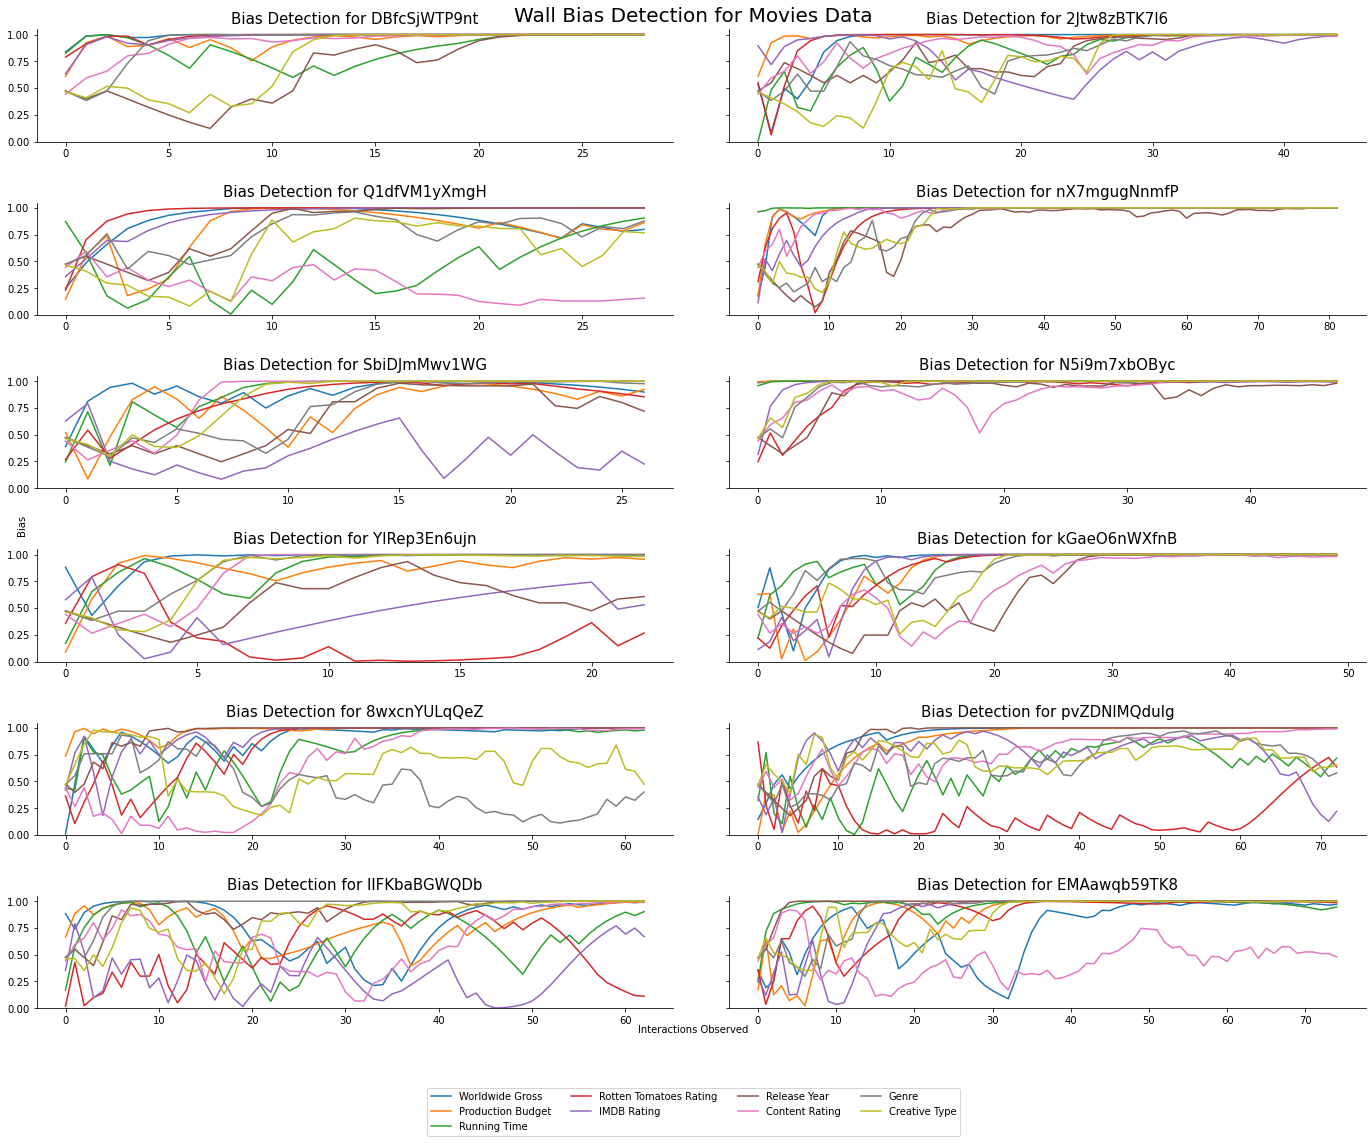

In [5]:
fig, axs = plt.subplots(6, 2, sharey=True, figsize=(20, 15))
fig.tight_layout(pad=4)
fig.suptitle('Wall Bias Detection for Movies Data', fontsize=20)
fig.text(0.5, 0.03, 'Interactions Observed', ha='center')
fig.text(0.03, 0.5, 'Bias', va='center', rotation='vertical')
plt.rcParams.update({'axes.titlesize': 15, 'axes.labelsize': 15,
                     'xtick.labelsize':12, 'xtick.labelsize':12})
for (m,n), ax in np.ndenumerate(axs):
    ax.set_ylim((0, 1.05))
#     ax.set(xlabel='Interactions Observed', ylabel= 'Bias')
#     ax.set_xlim(left=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

bias_metric_per_task = {'Worldwide Gross': 'bias-Worldwide Gross', 'Production Budget': 'bias-Production Budget',
                        'Running Time':'bias-Running Time','Rotten Tomatoes Rating': 'bias-Rotten Tomatoes Rating', 
                        'IMDB Rating': 'bias-IMDB Rating','Release Year': 'bias-Release Year',
                       'Content Rating':'bias-Content Rating','Genre':'bias-Genre','Creative Type': 'bias-Creative Type'}
columns = ['Worldwide Gross', 'Production Budget', 'Running Time', 'Rotten Tomatoes Rating', 'IMDB Rating',
           'Release Year', 'Content Rating', 'Genre', 'Creative Type']
index_1 = 0
index_2 = 0
for index, row in wall_results.iterrows():
    bias_over_time= pd.DataFrame()
    for ai, attr in enumerate(columns):
        temp_df = pd.DataFrame()
        temp_df[row['participant_id']] = row[bias_metric_per_task[attr]]
        bias_over_time = pd.concat([bias_over_time, temp_df], axis=1, ignore_index=True)
    bias_over_time.columns = columns
    bias_over_time.plot(ax=axs[index_1, index_2], title=f'Bias Detection for {row["participant_id"]}', legend = 0)
    if index != 11:
        if (index_2 == 1):
            index_2 = 0
            index_1 += 1
        else:
            index_2 += 1
    else:
        handles, labels = axs[index_1, index_2].get_legend_handles_labels()
        n_cols = round(len(columns)/2)
        fig.legend(handles, labels, loc='lower center', ncol=n_cols, bbox_to_anchor=(0.5, -0.07))